In [1]:
from datascience import *
import numpy as np
from path_data_variable import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
united = Table.read_table(path_data + 'united_summer2015.csv')
delay = united.select('Delay')

In [3]:
pop_mean = np.mean(delay.column('Delay'))
pop_mean

16.658155515370705

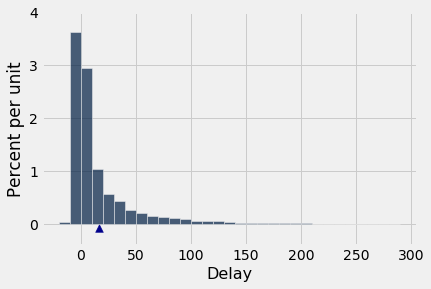

In [4]:
delay.hist(bins=np.arange(-20, 300, 10))
plots.scatter(pop_mean, -0.0008, marker='^', color='darkblue', s=60)
plots.ylim(-0.004, 0.04);

In [5]:
"""Empirical distribution of random sample means"""

def simulate_sample_mean(table, label, sample_size, repetitions):
    
    means = make_array()

    for i in range(repetitions):
        new_sample = table.sample(sample_size)
        new_sample_mean = np.mean(new_sample.column(label))
        means = np.append(means, new_sample_mean)

    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities
    sample_means.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(table.column(label)))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(table.column(label)))
    print("SD of sample means:", np.std(means))

Sample size:  100
Population mean: 16.658155515370705
Average of sample means:  16.672836
Population SD: 39.480199851609314
SD of sample means: 3.92467202924066


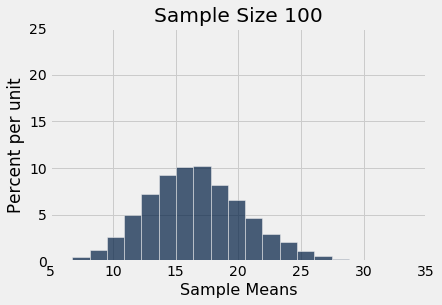

In [6]:
simulate_sample_mean(delay, 'Delay', 100, 10000)
plots.xlim(5, 35)
plots.ylim(0, 0.25);

Sample size:  400
Population mean: 16.658155515370705
Average of sample means:  16.678091499999997
Population SD: 39.480199851609314
SD of sample means: 1.9474592014668113


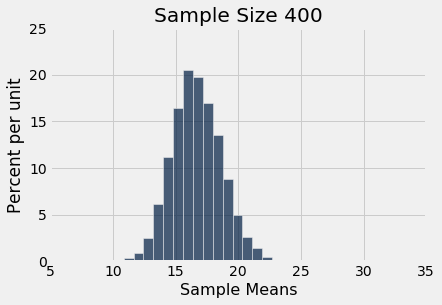

In [7]:
simulate_sample_mean(delay, 'Delay', 400, 10000)
plots.xlim(5, 35)
plots.ylim(0, 0.25);

Sample size:  625
Population mean: 16.658155515370705
Average of sample means:  16.649224
Population SD: 39.480199851609314
SD of sample means: 1.5883338034053167


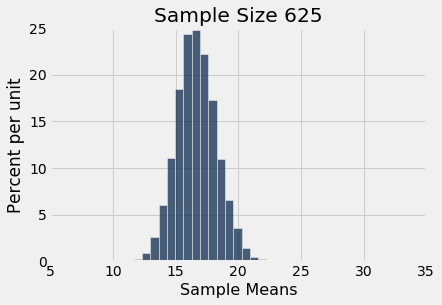

In [8]:
simulate_sample_mean(delay, 'Delay', 625, 10000)
plots.xlim(5, 35)
plots.ylim(0, 0.25);

In [9]:
pop_sd = np.std(delay.column('Delay'))
pop_sd

39.480199851609314

In [10]:
repetitions = 10000
sample_sizes = np.arange(25, 626, 25)

sd_means = make_array()

for n in sample_sizes:
    means = make_array()
    for i in np.arange(repetitions):
        means = np.append(means, np.mean(delay.sample(n).column('Delay')))
    sd_means = np.append(sd_means, np.std(means))

sd_comparison = Table().with_columns(
    'Sample Size n', sample_sizes,
    'SD of 10,000 Sample Means', sd_means,
    'pop_sd/sqrt(n)', pop_sd/np.sqrt(sample_sizes)
)

In [11]:
sd_comparison

Sample Size n | SD of 10,000 Sample Means | pop_sd/sqrt(n)
25            | 7.94482                   | 7.89604
50            | 5.6131                    | 5.58334
75            | 4.57417                   | 4.55878
100           | 3.98687                   | 3.94802
125           | 3.49769                   | 3.53122
150           | 3.22776                   | 3.22354
175           | 3.00675                   | 2.98442
200           | 2.77764                   | 2.79167
225           | 2.64268                   | 2.63201
250           | 2.49447                   | 2.49695
... (15 rows omitted)

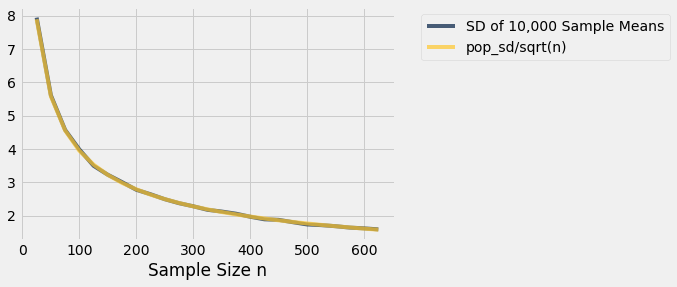

In [12]:
sd_comparison.plot('Sample Size n')